# House predictions with linear regression using a toy dataset

In [2]:
%run Coding_linear_regression.ipynb 
# allows us to use the functions we wrote

import numpy
import matplotlib.pyplot as plt

### Defining and plotting our dataset

Let's see how various implementations of Linear Regression work on our toy dataset.

{'features': array([1, 2, 3, 5, 6, 7]), 'labels': array([155, 197, 244, 356, 407, 448])}


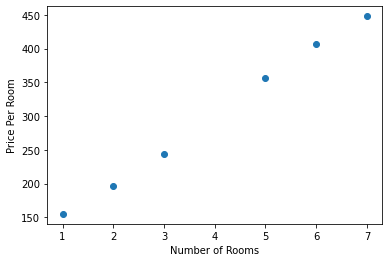

In [3]:
num_rooms = numpy.array([1,2,3,5,6,7])
price_rooms = numpy.array([155, 197, 244, 356,407,448])

dict_data = {
    'features': num_rooms,
    'labels'  : price_rooms,
}

print(dict_data)

plot_scatter(dict_data['features'], dict_data['labels'], "Number of Rooms", "Price Per Room")
plt.show()

### Linear Regression: Using our tricks

We'll call the implementation we wrote in the other notebook along with some of its functions.

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1351.26it/s]


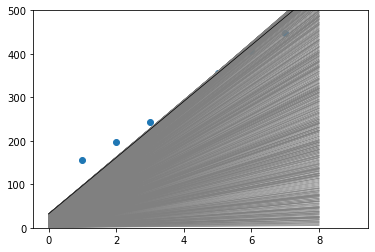

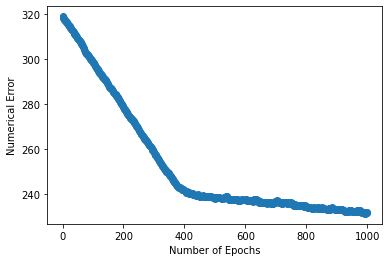

  1%|█▏                                                                          | 149/10000 [00:00<00:06, 1486.38it/s]

Price per room: 64.6988135039272
Base price: 31.81518936637274


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1316.82it/s]


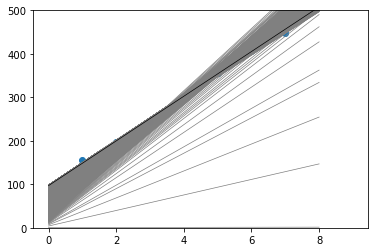

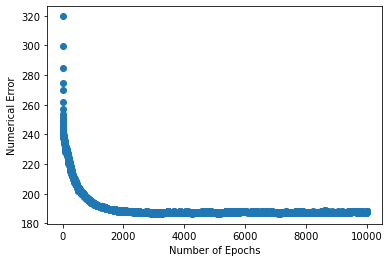

Price per room: 51.37932639433435
Base price: 96.98880650149441


In [4]:
# We set the random seed in order to always get the same results.
numpy.random.seed(0)

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)
slope, bias = linear_regression(
    dict_data['features'],
    dict_data['labels'],
    trick_function = absolute_trick,
    learning_rate = 0.05,
    error_metric = rmse,
    epochs = 1000)
print('Price per room:', slope)
print('Base price:', bias)

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)
slope, bias = linear_regression(
    dict_data['features'],
    dict_data['labels'],
    trick_function = square_trick,
    learning_rate = 0.01,
    error_metric = rmse,
    epochs = 10000)
print('Price per room:', slope)
print('Base price:', bias)

### Linear Regression: Using Turi Create

You can install turicreate on Linux and Mac. Works on Windows via WSL.

In [ ]:
import turicreate as tc

data = tc.SFrame(dict_data)

In [ ]:
data

In [ ]:
model = tc.linear_regression.create(data, target='labels')

In [ ]:
model.coefficients

In [ ]:
new_point = tc.SFrame({'features': [4]})

In [ ]:
model.predict(new_point)

### Linear Regression: Using statsmodels

In [5]:
import statsmodels.api as sm

# statsmodels doesn't automatically add an intercept (constant bias) column,
# so we have to add that ourselves.
exog = sm.add_constant(dict_data['features']) # adds an intercept column
model_linear_regression = sm.OLS(
    endog = dict_data['labels'], 
    exog = exog)
results_linear_regression = model_linear_regression.fit()

In [6]:
results_linear_regression.summary()

C:\Users\Peanut\miniconda3\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1941.
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           1.59e-06
Time:                        17:18:46   Log-Likelihood:                -18.100
No. Observations:                   6   AIC:                             40.20
Df Residuals:                       4   BIC:                             39.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.5952      5.200     19.155      0.000      85.159     114.031
x1            50.3929      1.144     44.060      0.000      47.217      53.568
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.022
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.833
Skew:                          -0.124   Prob(JB):                        0.659
Kurtosis:                       1.191   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
results_linear_regression.params # base-price and price per room

array([99.5952381 , 50.39285714])

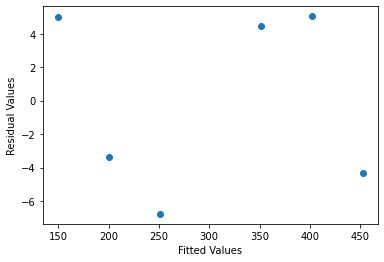

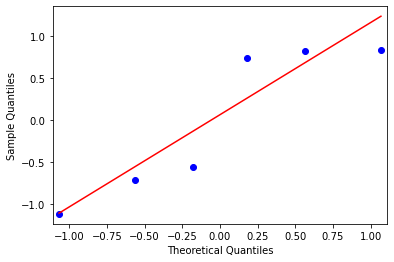

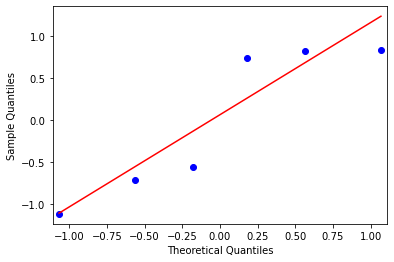

In [8]:
plot_scatter(
    results_linear_regression.fittedvalues, 
    results_linear_regression.resid,
    x_label = "Fitted Values",
    y_label = "Residual Values")
plt.show()

# Not sure why it plots twice
sm.qqplot(results_linear_regression.resid_pearson, line = "q")